In [48]:
%matplotlib inline

In [49]:
from copy import copy, deepcopy

from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib
import matplotlib.gridspec as gridspec

from matplotlib.transforms import Bbox, TransformedBbox, \
     blended_transform_factory

from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
     BboxConnectorPatch

In [178]:
%run ../../bioplotlib/collections.py
%run ../../bioplotlib/links.py
%run ../../bioplotlib/feature_shapes.py

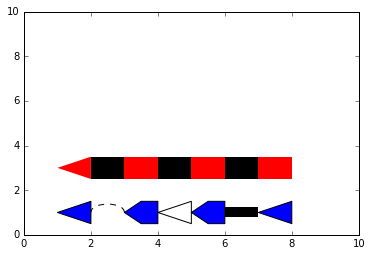

In [184]:
fig, ax = plt.subplots()
interval = [(1, 2, -1), (3, 4, -1), (5, 6, -1), (7, 8, -1)][::-1]

f = Feature(
    interval,
    shape=[
        new_shape(Triangle),
        new_shape(Arrow, head_length=0.5),
        new_shape(Triangle)
        ],
    between_shape=[
        new_shape(OpenRectangle, offset=0.5, width=0, facecolor="none", linewidth=10),
        new_shape(Triangle, facecolor="None"),
        new_shape(OpenSemicircle, facecolor="None", linestyle="dashed", width=0.5, offset=0.5)
        ],
    offset=0.5,
    )

ax.add_collection(f)

f = Feature(
    interval,
    shape=[
        new_shape(Rectangle, linewidth=0, facecolor="red"),
        new_shape(Arrow, linewidth=0, facecolor="red")
        ],
    between_shape=[
        new_shape(Rectangle, facecolor="black", linewidth=0)
        ],
    offset=2.5,
    )

ax.add_collection(f)

ax.set_ylim([0, 10])
ax.set_xlim([0, 10])
plt.show()

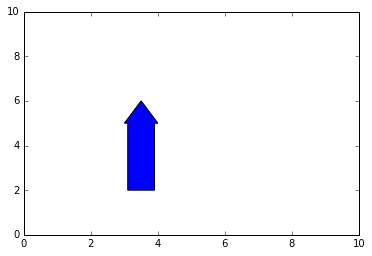

In [185]:
fig, ax = plt.subplots()

shape = Arrow(2, 6, 1, tail_width=0.8, offset=3, by_axis="y")

ax.add_patch(shape)

ax.set_ylim([0, 10])
ax.set_xlim([0, 10])
plt.show()


In [188]:
isinstance(shape, PathPatch)

False

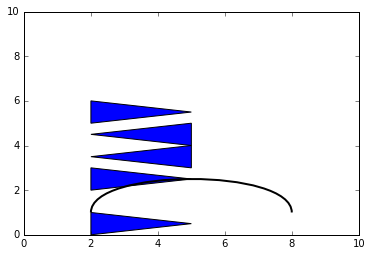

In [166]:
fig, ax = plt.subplots()

shape = Triangle(2, 5, 1, offset=5)
ax.add_patch(shape)
shape = Triangle(2, 5, -1, offset=4)
ax.add_patch(shape)

shape = Triangle(5, 2, 1, offset=3)
ax.add_patch(shape)
shape = Triangle(5, 2, -1, offset=2)
ax.add_patch(shape)

shape = OpenSemicircle(2, 8, width=2, offset=1, fill=None, linewidth=2)
ax.add_patch(shape)
shape = Triangle(2, 5, offset=0)
ax.add_patch(shape)

ax.set_ylim([0, 10])
ax.set_xlim([0, 10])
plt.show()

In [10]:
seq = SeqIO.read("../../bioplotlib/data/Sc-chr01.gb", 'genbank')

NameError: name 'feature_patches' is not defined

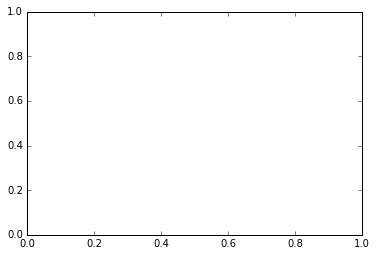

In [160]:
fig, ax = plt.subplots()

#feature_patches, text_patches = draw_region(seq, 60000, 100000)
for patch in feature_patches:
    ax.add_patch(patch)

#ax.set_ylim([0, 1])
#ax.set_xlim([60000, 100000])
ax.autoscale()
fig.set_size_inches(6, 1.5)
#fig.savefig(pjoin(step35, candidate['id'] + 'gene_structure.svg'))
plt.show()

In [139]:
shape

Arrow(start=1.5, end=2, offset=0, width=1, by=None)

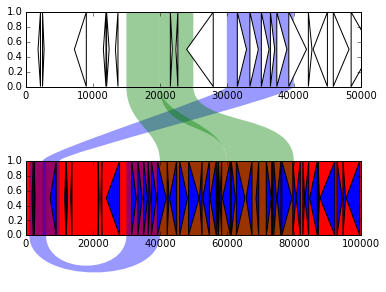

In [6]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 1, hspace=1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.set_xlim([0, 50000])
ax2.set_xlim([0, 100000])

slink = CrossLink(ax1=ax2, ax2=ax1, y1_range=[0, 1], y2_range=[1, 0], y1_control_point=0.2, alpha=0.4, linewidth=0., zorder=0)
slink(5000, 5000, 30000, 10000)
slink(60000, -20000, 20000, -5000, facecolor='green', y1_control_point=2)
slink(80000, -20000, 25000, -5000, facecolor='green', y1_control_point=2)

slink = CrossLink(ax1=ax2, y1_range=[1, 0], y1_control_point=-2, alpha=0.4, linewidth=0., zorder=0)
slink(1000, 5000, 30000, 10000)

feature_patches, dummy = draw_region(seq, 0, 100000, exon=Triangle(width=1., fill=True, facecolor='white'))
for patch in feature_patches:
    ax1.add_patch(patch)

feature_patches, dummy = draw_region(seq, 0, 100000, exon=Triangle(width=1., fill=True))
for patch in feature_patches:
    ax2.add_patch(patch)

ax1.patch.set_fill(False)
r = copy(ax2.patch)
r.set_facecolor('red')
r.set_zorder(0)
ax2.patch.set_fill(False)
fig.patches.insert(0, r)
plt.show()

TypeError: 'PathPatch' object is not iterable

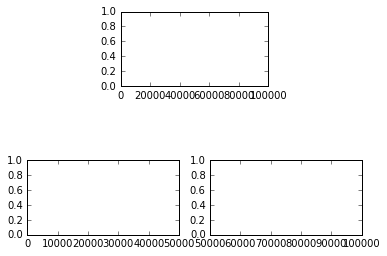

In [23]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 1, hspace=1)
rgs = gridspec.GridSpecFromSubplotSpec(
    1, 3,
    subplot_spec=gs[0],
    width_ratios=[1, 2, 1],
    )
qgs = gridspec.GridSpecFromSubplotSpec(
    1, 2,
    subplot_spec=gs[1],
    width_ratios=[1, 1],
    )
ax1 = fig.add_subplot(rgs[1])
ax2 = fig.add_subplot(qgs[0])
ax3 = fig.add_subplot(qgs[1])

ax1.set_xlim([0, 100000])
ax2.set_xlim([0, 50000])
ax3.set_xlim([50000, 100000])

feature_patches, dummy = draw_region(seq, 0, 100000, exon=Triangle(width=1., fill=True, facecolor='white'))
for patch in feature_patches:
    ax1.add_patch(patch)
feature_patches, dummy = draw_region(seq, 0, 100000, exon=Triangle(width=1., fill=True))
for patch in feature_patches:
    ax2.add_patch(patch)
feature_patches, dummy = draw_region(seq, 0, 100000, exon=Triangle(width=1., fill=True))
for patch in feature_patches:
    ax3.add_patch(patch)


slink = CrossLink(ax1=ax2, ax2=ax1, y1_range=[0, 1], y2_range=[1, 0], y1_control_point=0, alpha=0.4, linewidth=0., zorder=0)
slink(0, 49000, 0, 49000, facecolor='green')

slink = CrossLink(ax1=ax3, ax2=ax1, y1_range=[0, 1], y2_range=[1, 0], y1_control_point=0, alpha=0.4, linewidth=0., zorder=0)
slink(51000, 49000, 100000, -49000, facecolor='green')

slink = CrossLink(ax1=ax2, y1_range=[1, 0], y1_control_point=-2, alpha=0.4, linewidth=0., zorder=0)
slink(1000, 5000, 30000, 10000)

slink = CrossLink(ax1=ax2, ax2=ax3, y1_range=[1, 0], y1_control_point=-2, alpha=0.4, linewidth=0., zorder=0)
slink(20000, 5000, 60000, 10000)

slink = CrossLink(ax1=ax1, y1_range=[0, 1], y1_control_point=2, alpha=0.4, linewidth=0., zorder=0)
slink(20000, 5000, 60000, 10000)


ax1.patch.set_fill(False)
ax2.patch.set_fill(False)
ax3.patch.set_fill(False)

plt.show()

ValueError: too many values to unpack (expected 2)

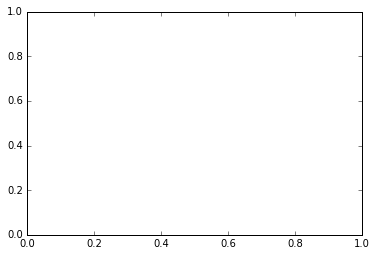

In [31]:
fig, ax = plt.subplots()

f = Feature(blocks=[(2, 3), (3, 4)], shapes=[Triangle(width=1, offset=-0.5, facecolor = "none")])
path, props = f.draw()

ax.add_collection(PathCollection(path, **props))

ax.set_ylim([0, 1])
ax.set_xlim([0, 10])
plt.show()